In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

current_directory = os.getcwd()
time = 1000
mtd_type = 'shuffle_diversity'
attack_operation_record = pd.read_csv(current_directory+ '\\data_analysis\\attack_operation_record_'+str(time)+'_'+mtd_type+'.csv')
mtd_operation_record = pd.read_csv(current_directory+'\\data_analysis\\mtd_operation_record_'+str(time)+'_'+mtd_type+'.csv')

In [2]:
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,IPShuffle,0.000000,50.360911,50.360911,network
1,IPShuffle,61.827047,111.978712,50.151664,network
2,osdiversity,92.240900,122.508460,30.267561,application
3,HostTopologyShuffle,123.221201,184.172693,60.951493,network
4,IPShuffle,216.144170,266.556902,50.412732,network


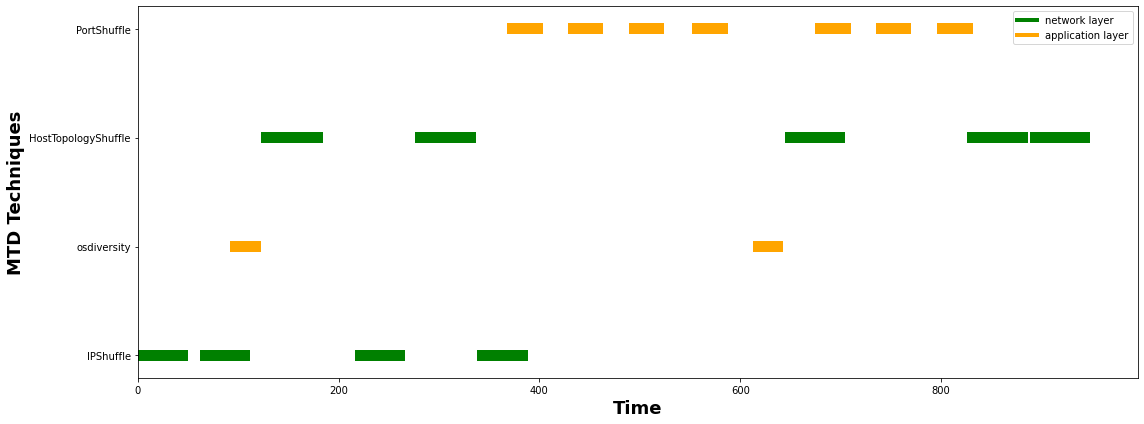

In [3]:
mtd_operation_record['color'] = np.where(mtd_operation_record['executed_at']=='network', 'green', 'orange')
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1, color=mtd_operation_record['color'])


custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                    Line2D([0], [0], color='orange', lw=4)]
ax.legend(custom_lines_mtd, ['network layer', 'application layer'], loc='upper right')
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [4]:
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,45.000000,20.000000,0,1,0,0,None,[],None,None
3,EXPLOIT_VULN,45.000000,50.360911,5.360911,0,1,0,0,None,[],network,IPShuffle
4,SCAN_HOST,52.360911,62.360911,10.000000,-1,0,0,0,None,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
58,SCAN_PORT,913.065355,933.065355,20.000000,37,1,131,4,None,[],None,None
59,EXPLOIT_VULN,933.065355,948.248238,15.182883,37,1,131,4,None,[],network,HostTopologyShuffle
60,SCAN_HOST,950.248238,960.248238,10.000000,-1,0,131,4,None,[],None,None
61,ENUM_HOST,960.248238,975.248238,15.000000,-1,0,131,4,None,[],None,None


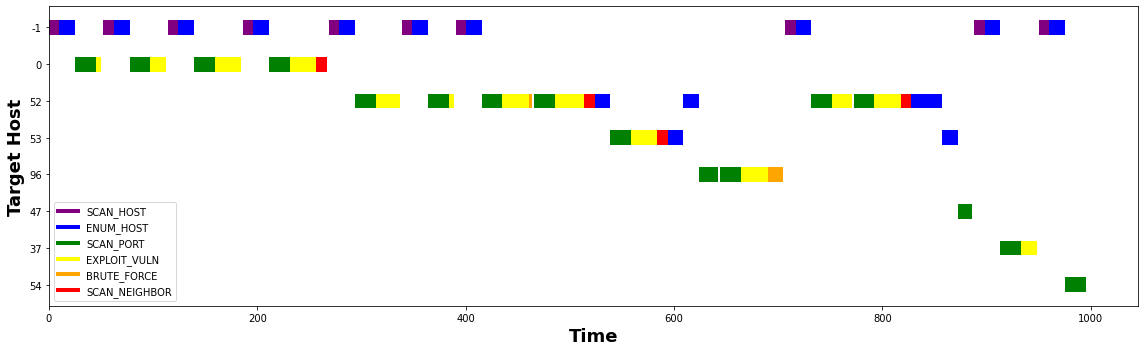

In [182]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))

colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red']
attack_action_legend = []
attack_action_legend_name = []
for i, v in enumerate(attack_operation_record['name'].unique()):
    attack_operation_record.loc[attack_operation_record.name == v, 'color'] = colors[i]
    attack_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    attack_action_legend_name.append(v)

ax2.barh(attack_operation_record['current_host'].astype(str), attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.4, color=attack_operation_record['color'] )

ax2.legend(attack_action_legend, attack_action_legend_name, loc='lower left')
plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Target Host', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_action_record.png')
plt.show()

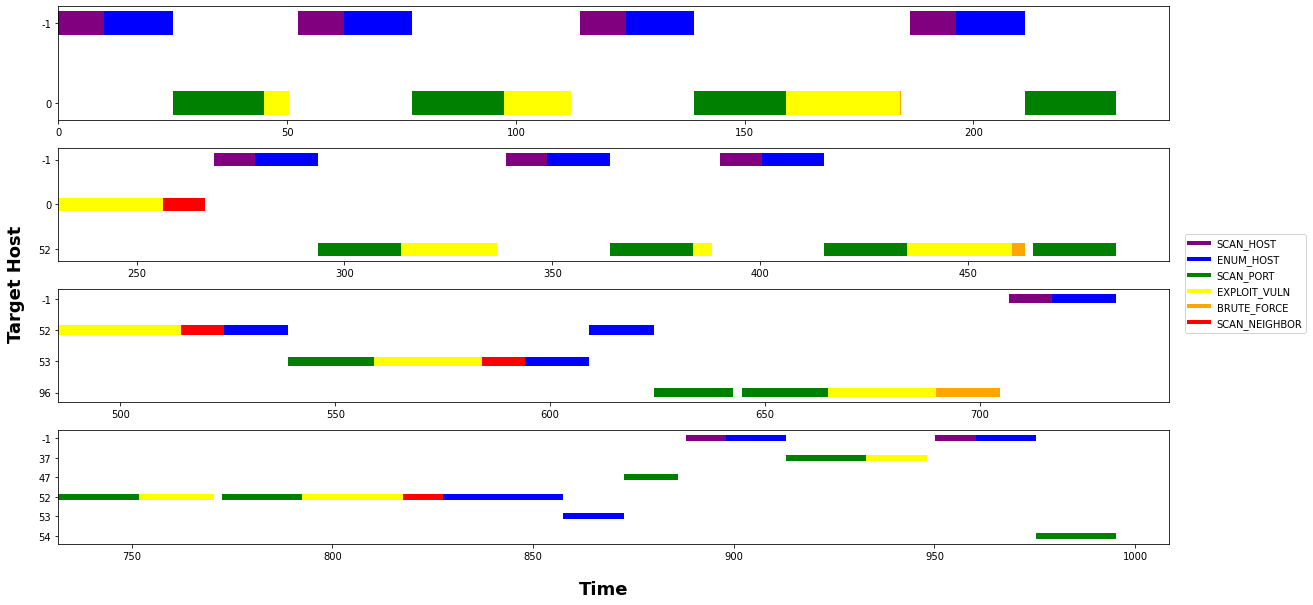

In [187]:
fig3, ax3 = plt.subplots(figsize=(16, 8))

# Set common labels
fig3.text(0.5, -0.03, 'Time', ha='center', va='center', weight='bold', fontsize=18)
fig3.text(-0.01, 0.5, 'Target Host', ha='center', va='center', rotation='vertical', weight='bold', fontsize=18)
fig3.legend(attack_action_legend, attack_action_legend_name, loc='center left', bbox_to_anchor=(1, 0.5))

for i in [1,2,3,4]:
    plt.subplot(4, 1, i)
    sub_record = attack_operation_record[(attack_operation_record['finish_time']<=int(time * i/4)) & (attack_operation_record['finish_time'] > int(time * (i-1)/4))]
    sub_record = sub_record.sort_values(by=['current_host'])
    plt.barh(y=sub_record['current_host'].astype(str), width=sub_record['duration'], left=sub_record['start_time'], height=0.3, color=sub_record['color'])
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('data_analysis/attack_action_record_subplots.png', bbox_inches="tight")
plt.show()
# how to combine different MTD techniques
# executed at the same time / alternatively / randomly / at different rates
# implement same time execution MTDs at fixed interval
# individual/ subnet / full

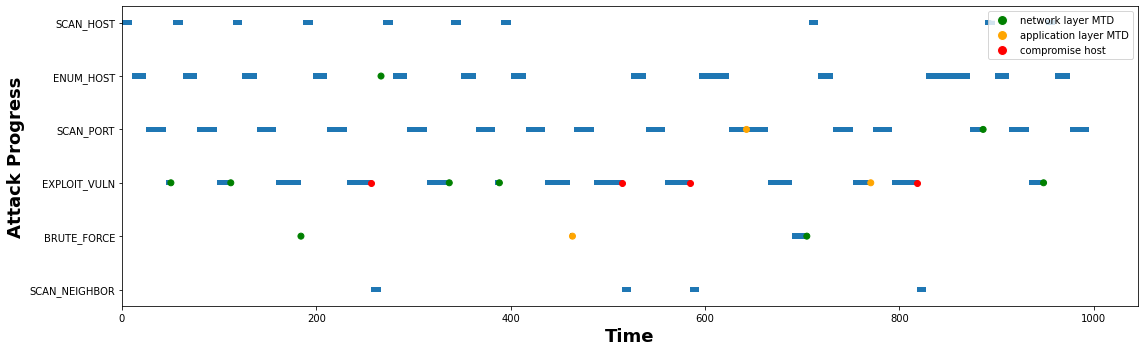

In [6]:
fig4, ax4 = plt.subplots(1, figsize=(16, 5))
ax4.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax4.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax4.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax4.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig4.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
16,EXPLOIT_VULN,231.172693,256.439801,25.267107,0,4,5,0,0,"['Cherrita', 'Moyna', 'Wallis', 'Filippa', 'Ge...",None,None
33,EXPLOIT_VULN,485.536267,514.021804,28.485537,52,3,52,1,52,"['Horatia', 'Gwenora', 'Jenilee', 'Cristy']",None,None
37,EXPLOIT_VULN,559.021804,584.087074,25.065269,53,1,85,2,53,"['Lilah', 'Katrina', 'Georgeanne', 'Julita', '...",None,None
50,EXPLOIT_VULN,792.456606,817.538899,25.082293,52,5,111,3,52,"['Berenice', 'Libbey', 'Reggi', 'Zorana', 'Mar...",None,None


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
